In [411]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

parameters = {
    "paths": {
        "meteo": "../data/barcelona_meteo.csv",
        "demand": "../data/CE_EO_Demanda.xlsx"
    }
}

In [412]:
demand_df = pd.read_excel(parameters["paths"]["demand"], sheet_name="Demanda")
demand_df["Date"] = pd.to_datetime(demand_df["Date"])
print(f"Number of rows: {demand_df.shape[0]}")
demand_df.head(5)

Number of rows: 70080


,Date,Demanda
0,2018-01-01 00:15:00,8
1,2018-01-01 00:30:00,8
2,2018-01-01 00:45:00,8
3,2018-01-01 01:00:00,8
4,2018-01-01 01:15:00,8


In [413]:
#Prints the NaN Values per Column of a dataset
def checkNaNValues(df):
    return print(f"NaN Count per Column", df.isna().any(axis=1).sum())
checkNaNValues(demand_df)


NaN Count per Column 0


In [414]:
def checkMissingData(df, date_column):
    min_date = df[date_column].min()
    max_date = df[date_column].max()

    date_range = pd.date_range(start=min_date, end=max_date, freq='15min')
    missing_dates = date_range[~date_range.isin(df[date_column])]
    print(f"Number of Missing Values: {missing_dates.shape[0]}")
    return None if missing_dates.shape[0] == 0 else missing_dates
missing_data = checkMissingData(demand_df, "Date")

Number of Missing Values: 0


In [415]:
meteo_df = pd.read_csv(parameters["paths"]["meteo"])
print(f"Number of rows: {demand_df.shape[0]}")
meteo_df = meteo_df.rename(columns={'date': 'Date'})

meteo_df["Date"] = pd.to_datetime(meteo_df["Date"], format='%m/%d/%y %H:%M')
display(meteo_df)


Number of rows: 70080


,Date,Temperatura,Relative_Humidity,Precipitation_Total,Sunshine_Duration,Shortwave_Radiation,Direct_Shortwave_Radiation,Diffuse_Shortwave_Radiation
0,2017-01-01 00:00:00,8.422492,83,0.0,0.000000,0.00,0.000000,0.000000
1,2017-01-01 01:00:00,7.992492,81,0.0,0.000000,0.00,0.000000,0.000000
2,2017-01-01 02:00:00,7.642492,79,0.0,0.000000,0.00,0.000000,0.000000
3,2017-01-01 03:00:00,6.912492,79,0.0,0.000000,0.00,0.000000,0.000000
4,2017-01-01 04:00:00,6.352492,81,0.0,0.000000,0.00,0.000000,0.000000
...,...,...,...,...,...,...,...,...
29467,2020-05-12 19:00:00,17.932491,63,0.0,56.361702,418.30,248.855300,169.444690
29468,2020-05-12 20:00:00,17.402493,63,0.0,53.106384,247.42,139.036250,108.383750
29469,2020-05-12 21:00:00,16.672491,66,0.0,55.595745,72.09,38.165344,33.924652
29470,2020-05-12 22:00:00,16.682491,67,0.0,2.032979,0.00,0.000000,0.000000


In [416]:
checkNaNValues(meteo_df)
meteo_df.set_index('Date', inplace=True)
meteo_resampled_df = meteo_df.resample('15min').asfreq()
meteo_resampled_df.reset_index(inplace=True)
missing_meteo_data = checkMissingData(meteo_resampled_df, "Date")
display(meteo_resampled_df)


NaN Count per Column 0
Number of Missing Values: 0


,Date,Temperatura,Relative_Humidity,Precipitation_Total,Sunshine_Duration,Shortwave_Radiation,Direct_Shortwave_Radiation,Diffuse_Shortwave_Radiation
0,2017-01-01 00:00:00,8.422492,83.0,0.0,0.000000,0.0,0.0,0.0
1,2017-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-01 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-01 01:00:00,7.992492,81.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
117880,2020-05-12 22:00:00,16.682491,67.0,0.0,2.032979,0.0,0.0,0.0
117881,2020-05-12 22:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117882,2020-05-12 22:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117883,2020-05-12 22:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [417]:
#Data Interpolation
def interpolateData(df, columns, method):
    interpolated_df = df.copy()
    for col in columns:
        interpolated_df[col] = interpolated_df[col].interpolate(method=method)
    return interpolated_df
columns2interpolate = meteo_resampled_df.columns.drop("Date")
df_meteo_interpolated = interpolateData(meteo_resampled_df, columns2interpolate, 'linear')
display(df_meteo_interpolated)

,Date,Temperatura,Relative_Humidity,Precipitation_Total,Sunshine_Duration,Shortwave_Radiation,Direct_Shortwave_Radiation,Diffuse_Shortwave_Radiation
0,2017-01-01 00:00:00,8.422492,83.0,0.0,0.000000,0.0,0.0,0.0
1,2017-01-01 00:15:00,8.314992,82.5,0.0,0.000000,0.0,0.0,0.0
2,2017-01-01 00:30:00,8.207492,82.0,0.0,0.000000,0.0,0.0,0.0
3,2017-01-01 00:45:00,8.099992,81.5,0.0,0.000000,0.0,0.0,0.0
4,2017-01-01 01:00:00,7.992492,81.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
117880,2020-05-12 22:00:00,16.682491,67.0,0.0,2.032979,0.0,0.0,0.0
117881,2020-05-12 22:15:00,16.672491,66.5,0.0,1.524734,0.0,0.0,0.0
117882,2020-05-12 22:30:00,16.662492,66.0,0.0,1.016489,0.0,0.0,0.0
117883,2020-05-12 22:45:00,16.652492,65.5,0.0,0.508245,0.0,0.0,0.0


In [418]:
min_date = demand_df["Date"].min()
max_date = demand_df["Date"].max()
new_meteo = df_meteo_interpolated[df_meteo_interpolated["Date"].between(min_date, max_date)]
print(f"Demand Dataset Length: {demand_df.shape[0]}, Meteo Dataset Length: {new_meteo.shape[0]}")
display(new_meteo.head(10))

Demand Dataset Length: 70080, Meteo Dataset Length: 70080


,Date,Temperatura,Relative_Humidity,Precipitation_Total,Sunshine_Duration,Shortwave_Radiation,Direct_Shortwave_Radiation,Diffuse_Shortwave_Radiation
35041,2018-01-01 00:15:00,12.967492,60.50,0.0,0.0,0.0,0.0,0.0
35042,2018-01-01 00:30:00,12.972492,61.00,0.0,0.0,0.0,0.0,0.0
35043,2018-01-01 00:45:00,12.977492,61.50,0.0,0.0,0.0,0.0,0.0
35044,2018-01-01 01:00:00,12.982492,62.00,0.0,0.0,0.0,0.0,0.0
35045,2018-01-01 01:15:00,12.709992,61.50,0.0,0.0,0.0,0.0,0.0
35046,2018-01-01 01:30:00,12.437492,61.00,0.0,0.0,0.0,0.0,0.0
35047,2018-01-01 01:45:00,12.164992,60.50,0.0,0.0,0.0,0.0,0.0
35048,2018-01-01 02:00:00,11.892492,60.00,0.0,0.0,0.0,0.0,0.0
35049,2018-01-01 02:15:00,11.567492,59.75,0.0,0.0,0.0,0.0,0.0
35050,2018-01-01 02:30:00,11.242492,59.50,0.0,0.0,0.0,0.0,0.0


In [419]:
#Outliers
def getNumberOfOutliersPerColumn(df, columns_list):
    for col in columns_list:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1

        #Calcular los límites inferiores y superiores para identificar outliers
        lim_inf = q1 - 1.5 * iqr
        lim_sup = q3 + 1.5 * iqr

        outliers = ((df[col] < lim_inf) | (df[col] > lim_sup))
        #print(outliers.index[outliers])
        print(f"For {col} Column, the Number of Outliers is {outliers.sum()}\n")

getNumberOfOutliersPerColumn(df_meteo_interpolated, columns2interpolate)

For Temperatura Column, the Number of Outliers is 0

For Relative_Humidity Column, the Number of Outliers is 761

For Precipitation_Total Column, the Number of Outliers is 8572

For Sunshine_Duration Column, the Number of Outliers is 0

For Shortwave_Radiation Column, the Number of Outliers is 376

For Direct_Shortwave_Radiation Column, the Number of Outliers is 5240

For Diffuse_Shortwave_Radiation Column, the Number of Outliers is 0



In [420]:
demand_df["Year"] = demand_df["Date"].dt.year
demand_df["Month"] = demand_df["Date"].dt.month
demand_df["Hour"] = demand_df["Date"].dt.hour
demand_df["DayOfWeek"] = demand_df["Date"].dt.day_of_week
demand_df["DayOfYear"] = demand_df["Date"].dt.day_of_year

display(demand_df.head(10))

,Date,Demanda,Year,Month,Hour,DayOfWeek,DayOfYear
0,2018-01-01 00:15:00,8,2018,1,0,0,1
1,2018-01-01 00:30:00,8,2018,1,0,0,1
2,2018-01-01 00:45:00,8,2018,1,0,0,1
3,2018-01-01 01:00:00,8,2018,1,1,0,1
4,2018-01-01 01:15:00,8,2018,1,1,0,1
5,2018-01-01 01:30:00,8,2018,1,1,0,1
6,2018-01-01 01:45:00,12,2018,1,1,0,1
7,2018-01-01 02:00:00,8,2018,1,2,0,1
8,2018-01-01 02:15:00,8,2018,1,2,0,1
9,2018-01-01 02:30:00,8,2018,1,2,0,1


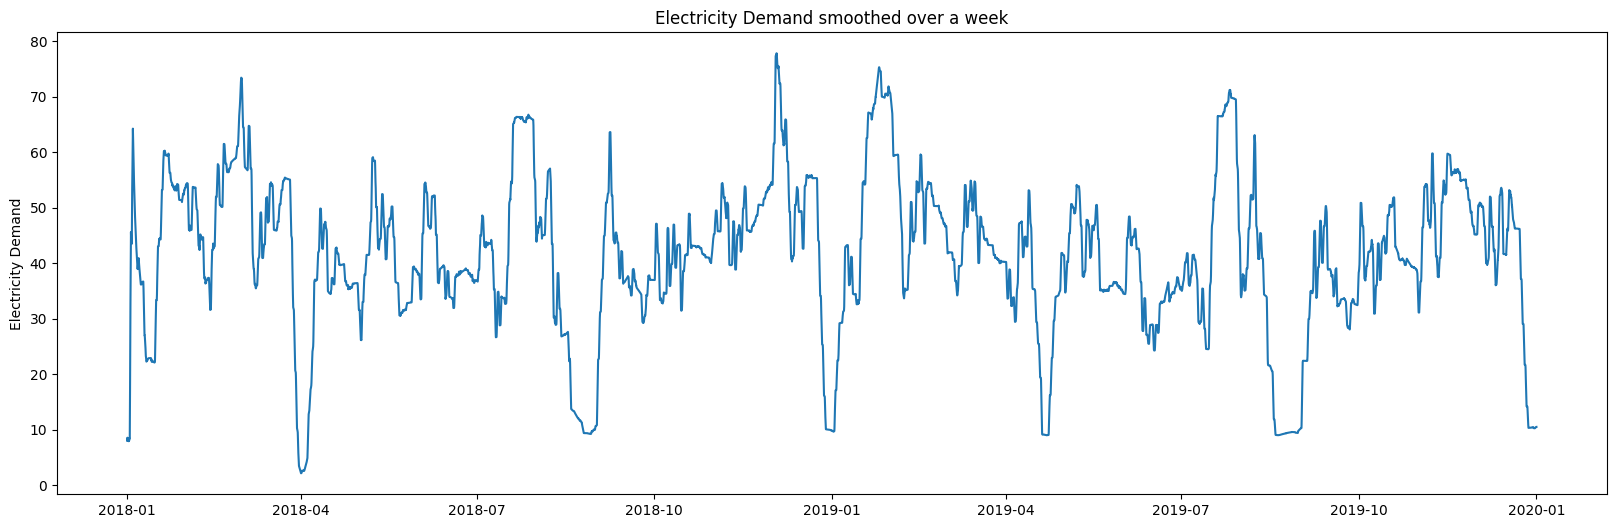

In [421]:
demand_df.index = pd.DatetimeIndex(demand_df["Date"])
demand_df = demand_df.sort_index()
plt.figure(figsize=(20, 6))
plt.ylabel("Electricity Demand")
plt.title("Electricity Demand smoothed over a week")
plt.plot(demand_df['Demanda'].rolling(timedelta(days=7)).mean())
plt.show()

In [422]:
import plotly.graph_objects as go
demand_df_1w = demand_df.resample('1W').mean()
fig = go.Figure()
fig.add_trace(go.Scatter(x=demand_df_1w.index, y=demand_df_1w["Demanda"], mode='lines'))
fig.update_layout(
    title = "Hourly Energy Demand",
    xaxis_title = "Date",
    yaxis_title = "Demand (MWh)",
    width = 850,
    height = 400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

In [423]:
start_date = demand_df['Date'].min()
end_date = start_date + timedelta(days=31)
df_month1 = demand_df.loc[(demand_df['Date'] >= start_date) & (demand_df['Date'] <= end_date)]
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_month1.index, y=df_month1["Demanda"], mode='lines'))
fig.update_layout(
    title = "One Week Energy Demand",
    xaxis_title = "Date",
    yaxis_title = "Demand (MWh)",
    width = 850,
    height = 400,
    margin=dict(l=20, r=20, t=35, b=20),
    legend=dict(
        orientation="h",
        yanchor="top",
        y=1,
        xanchor="left",
        x=0.001
    )
)
fig.show()

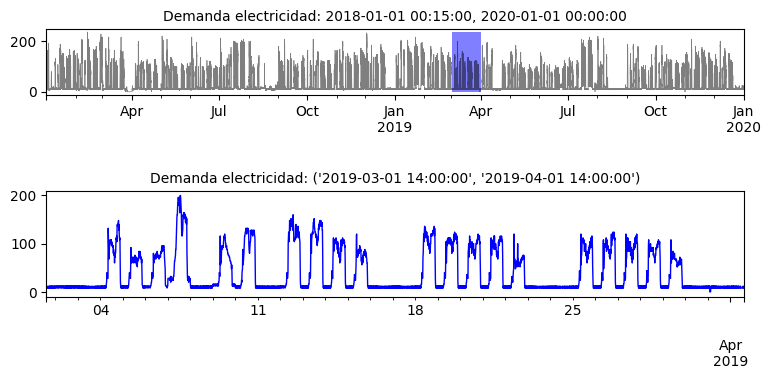

In [424]:
#Gráfico serie temporal con zoom
zoom = ('2019-03-01 14:00:00','2019-04-01 14:00:00')
fig = plt.figure(figsize=(9, 4))
grid = plt.GridSpec(nrows=8, ncols=1, hspace=.6, wspace=0)
main_ax = fig.add_subplot(grid[1:3, :])
zoom_ax = fig.add_subplot(grid[5:, :])
demand_df.Demanda.plot(ax=main_ax, c="black", alpha=0.5, linewidth=0.5)
min_y = min(demand_df.Demanda)
max_y = max(demand_df.Demanda)
main_ax.fill_between(zoom, min_y, max_y, facecolor='blue', alpha=0.5, zorder=0)
main_ax.set_xlabel('')
demand_df.loc[zoom[0]: zoom[1]].Demanda.plot(ax=zoom_ax, color='blue', linewidth=1)
main_ax.set_title(f'Demanda electricidad: {demand_df.index.min()}, {demand_df.index.max()}', fontsize=10)
zoom_ax.set_title(f'Demanda electricidad: {zoom}', fontsize=10)
zoom_ax.set_xlabel('')
plt.subplots_adjust(hspace=1)

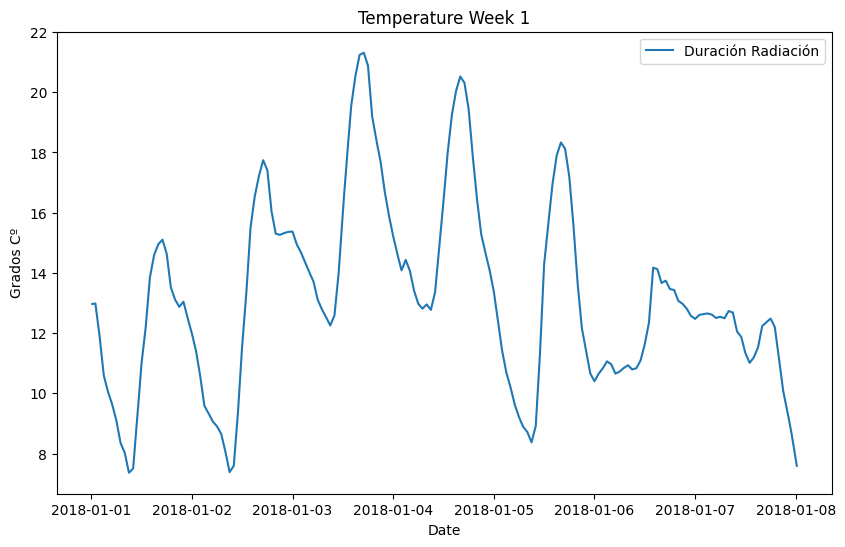

In [425]:
end_date = start_date + timedelta(days=7)
df_week1_temp = df_meteo_interpolated.loc[(df_meteo_interpolated['Date'] >= start_date) & (df_meteo_interpolated['Date'] <= end_date)]
plt.figure(figsize=(10, 6))
plt.plot(df_week1_temp["Date"], df_week1_temp['Temperatura'], label='Duración Radiación')
plt.title('Temperature Week 1')
plt.xlabel('Date')
plt.ylabel('Grados Cº')
plt.legend()

plt.show()

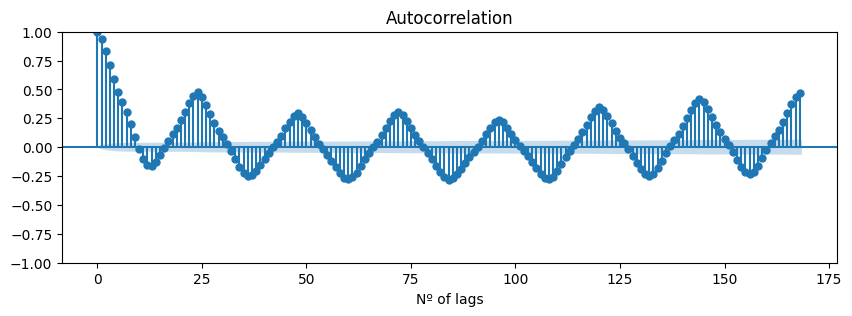

In [426]:
#Gráfico de autocorrelación 1
demand_df_1h = demand_df.resample('1h').mean()
fig, ax = plt.subplots(figsize=(10, 3))
plt.xlabel("Nº of lags")
plot_acf(demand_df_1h.Demanda, ax=ax, lags=24*7)
plt.show()

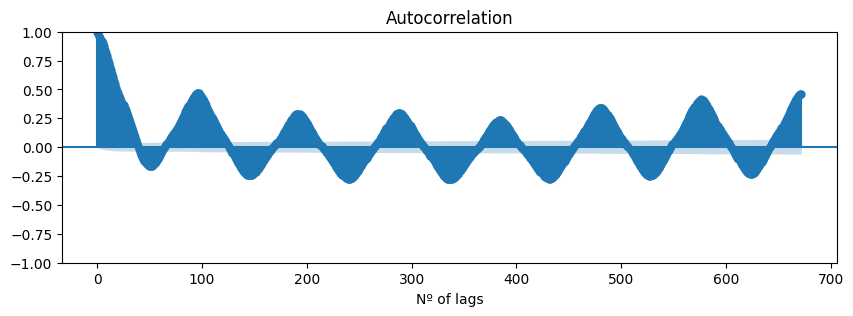

In [388]:
#Gráfico de autocorrelación 2
fig, ax = plt.subplots(figsize=(10, 3))
plt.xlabel("Nº of lags")
plot_acf(demand_df.Demanda, ax=ax, lags=96*7)
plt.show()

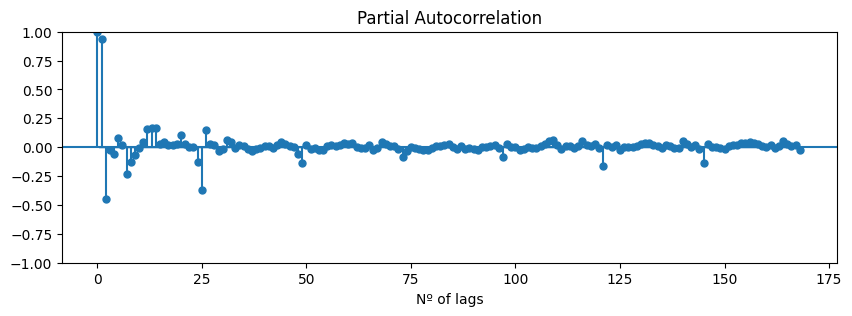

In [389]:
#Gráfico de autocorrelación parcial
fig, ax = plt.subplots(figsize=(10, 3))
plt.xlabel("Nº of lags")
plot_pacf(demand_df_1h.Demanda, ax=ax, lags=24*7)
plt.show()

In [390]:
display(demand_df.head(5))
demand_df.reset_index(drop=True, inplace=True)

,Date,Demanda,Year,Month,Hour,DayOfWeek,DayOfYear
Date,,,,,,,
2018-01-01 00:15:00,2018-01-01 00:15:00,8,2018,1,0,0,1
2018-01-01 00:30:00,2018-01-01 00:30:00,8,2018,1,0,0,1
2018-01-01 00:45:00,2018-01-01 00:45:00,8,2018,1,0,0,1
2018-01-01 01:00:00,2018-01-01 01:00:00,8,2018,1,1,0,1
2018-01-01 01:15:00,2018-01-01 01:15:00,8,2018,1,1,0,1


In [391]:
#Merge Demand Dataset and Meteo Dataset
whole_df = pd.merge(demand_df, df_meteo_interpolated, on='Date', how='inner')
display(whole_df.head(10))

,Date,Demanda,Year,Month,Hour,DayOfWeek,DayOfYear,Temperatura,Relative_Humidity,Precipitation_Total,Sunshine_Duration,Shortwave_Radiation,Direct_Shortwave_Radiation,Diffuse_Shortwave_Radiation
0,2018-01-01 00:15:00,8,2018,1,0,0,1,12.967492,60.50,0.0,0.0,0.0,0.0,0.0
1,2018-01-01 00:30:00,8,2018,1,0,0,1,12.972492,61.00,0.0,0.0,0.0,0.0,0.0
2,2018-01-01 00:45:00,8,2018,1,0,0,1,12.977492,61.50,0.0,0.0,0.0,0.0,0.0
3,2018-01-01 01:00:00,8,2018,1,1,0,1,12.982492,62.00,0.0,0.0,0.0,0.0,0.0
4,2018-01-01 01:15:00,8,2018,1,1,0,1,12.709992,61.50,0.0,0.0,0.0,0.0,0.0
5,2018-01-01 01:30:00,8,2018,1,1,0,1,12.437492,61.00,0.0,0.0,0.0,0.0,0.0
6,2018-01-01 01:45:00,12,2018,1,1,0,1,12.164992,60.50,0.0,0.0,0.0,0.0,0.0
7,2018-01-01 02:00:00,8,2018,1,2,0,1,11.892492,60.00,0.0,0.0,0.0,0.0,0.0
8,2018-01-01 02:15:00,8,2018,1,2,0,1,11.567492,59.75,0.0,0.0,0.0,0.0,0.0
9,2018-01-01 02:30:00,8,2018,1,2,0,1,11.242492,59.50,0.0,0.0,0.0,0.0,0.0


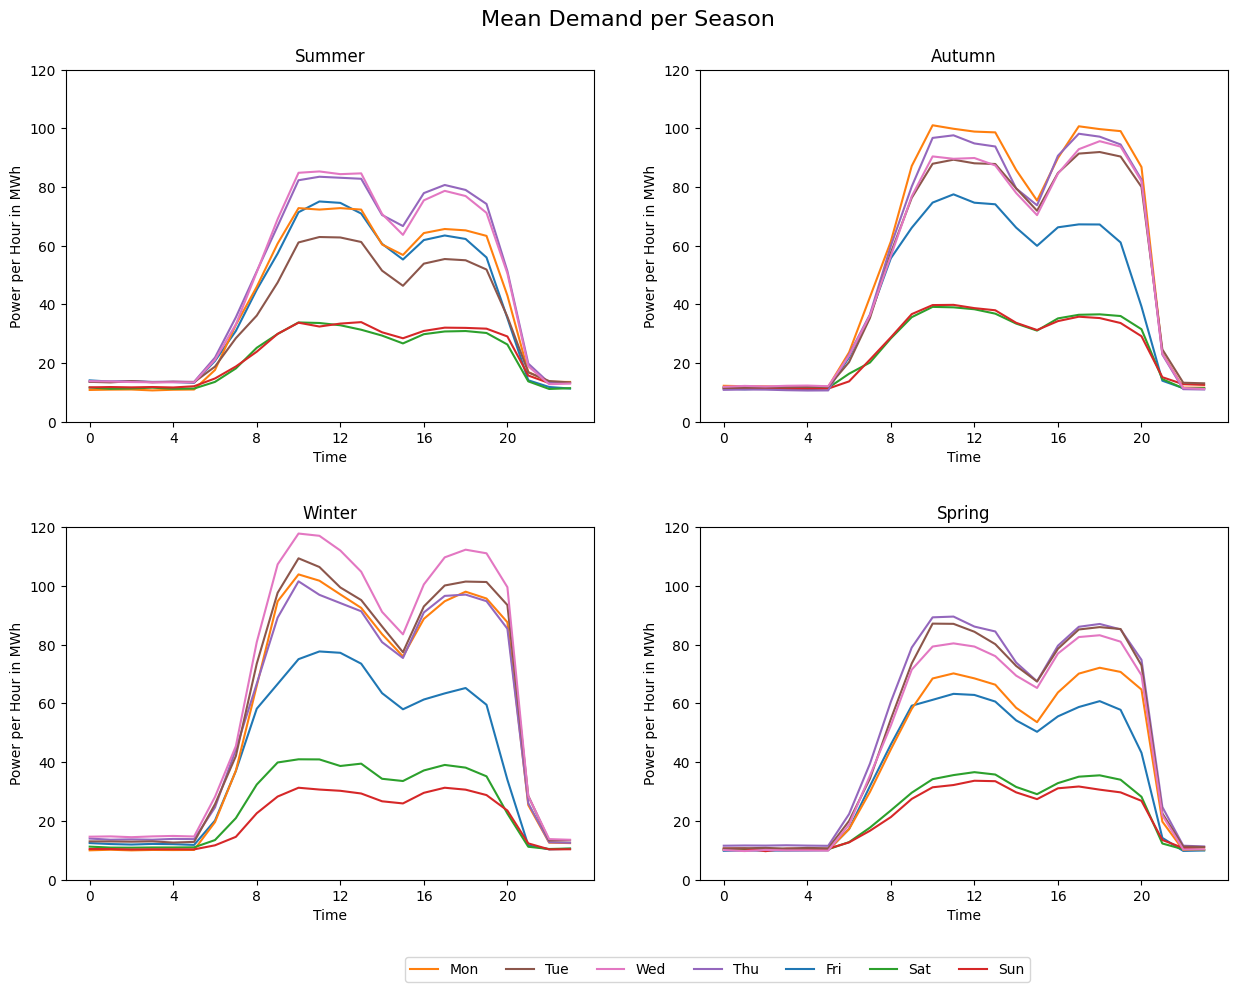

In [392]:
days_mapping = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
new_whole_df = whole_df.copy()
new_whole_df["Day"] = new_whole_df["DayOfWeek"].map(days_mapping)
new_whole_df["Season"] = new_whole_df["Month"].apply(
    lambda x: (
        'Spring' if x in [3, 4, 5]
        else 'Summer' if x in [6, 7, 8]
        else 'Autumn' if x in [9, 10, 11]
        else 'Winter'
    )
)
fig, axes = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.2, hspace=0.3, top=0.92)
fig.suptitle("Mean Demand per Season", fontsize=16)

fig.set_figheight(10)
fig.set_figwidth(15)

ymin, ymax = 0, 120

#Season Summer
new_whole_df.loc[new_whole_df["Season"] == "Summer"] \
    .groupby([new_whole_df.loc[new_whole_df["Season"] == "Summer"]["Hour"], 'Day'])["Demanda"].mean().unstack().plot(
        ax=axes[0, 0], ylim=(ymin, ymax), title="Summer", legend=False
    )
new_whole_df.loc[new_whole_df["Season"] == "Autumn"] \
    .groupby([new_whole_df.loc[new_whole_df["Season"] == "Autumn"]["Hour"], 'Day'])["Demanda"].mean().unstack().plot(
        ax=axes[0, 1], ylim=(ymin, ymax), title="Autumn", legend=False
    )
new_whole_df.loc[new_whole_df["Season"] == "Winter"] \
    .groupby([new_whole_df.loc[new_whole_df["Season"] == "Winter"]["Hour"], 'Day'])["Demanda"].mean().unstack().plot(
        ax=axes[1, 0], ylim=(ymin, ymax), title="Winter", legend=False
    )
new_whole_df.loc[new_whole_df["Season"] == "Spring"] \
    .groupby([new_whole_df.loc[new_whole_df["Season"] == "Spring"]["Hour"], 'Day'])["Demanda"].mean().unstack().plot(
        ax=axes[1, 1], ylim=(ymin, ymax), title="Spring", legend=False
    )

for ax in axes.flat:
    ax.set(xlabel='Time', ylabel='Power per Hour in MWh')

for n in range(0, 2):
    axes[n, 0].set_xticks([0, 4, 8, 12, 16, 20])
    axes[n, 1].set_xticks([0, 4, 8, 12, 16, 20])

# LEGEND
handles, labels = plt.gca().get_legend_handles_labels() # reorder Legend Labels
order = [1,5,6,4,0,2,3]      # specify order in Legend
axes[1,1].legend([handles[i] for i in order], [labels[i] for i in order], loc=1, ncol=7, 
                 bbox_to_anchor=(0.638,-0.2), frameon=True) # print and order LEGEND

In [402]:
#Generate a new column called h_sen, wich is the hour transformed by the sine function
def generateSinCosHour(df):
    df['Hour_sen'] = (np.pi * np.sin(df['Hour']) / 12)
    df['Hour_cos'] = (np.pi * np.cos(df["Hour"]) / 12)
    return df
whole_df["Demanda_7d"] = whole_df["Demanda"].shift(7 * 96).fillna(0)
whole_df["isWeekend"] = whole_df["DayOfWeek"].isin([5, 6])

whole_df = generateSinCosHour(whole_df)

In [405]:
display(whole_df.head(5))

,Date,Demanda,Year,Month,Hour,DayOfWeek,DayOfYear,Temperatura,Relative_Humidity,Precipitation_Total,Sunshine_Duration,Shortwave_Radiation,Direct_Shortwave_Radiation,Diffuse_Shortwave_Radiation,Hour_sen,Hour_cos,Demanda_7d,isWeekend
0,2018-01-01 00:15:00,8,2018,1,0,0,1,12.967492,60.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,0.0,False
1,2018-01-01 00:30:00,8,2018,1,0,0,1,12.972492,61.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,0.0,False
2,2018-01-01 00:45:00,8,2018,1,0,0,1,12.977492,61.5,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,0.0,False
3,2018-01-01 01:00:00,8,2018,1,1,0,1,12.982492,62.0,0.0,0.0,0.0,0.0,0.0,0.220297,0.141451,0.0,False
4,2018-01-01 01:15:00,8,2018,1,1,0,1,12.709992,61.5,0.0,0.0,0.0,0.0,0.0,0.220297,0.141451,0.0,False


In [432]:
def getDayBeforeDemand(df, row):
    date = row["Date"]
    counter, demand_24h = 0, 0
    if row.isWeekend:
        while counter < 7:
            date -= timedelta(days=1)
            row_24h = df.loc[df["Date"] == date]
            if not row_24h.empty:
                row_24h = row_24h.iloc[[0]].squeeze()
                if row_24h["isWeekend"]:
                    demand_24h = row_24h["Demanda"]
                    break
            counter += 1
    else:
        while counter < 7:
            date -= timedelta(days=1)
            row_24h = df.loc[df["Date"] == date]
            if not row_24h.empty:
                row_24h = row_24h.iloc[[0]].squeeze()
                if row_24h["isWeekend"]:
                    demand_24h = row_24h["Demanda"]
                    break
            counter += 1
    return demand_24h

whole_df["Demanda_24h"] = whole_df.apply(
    lambda row: getDayBeforeDemand(whole_df, row), axis=1
)

,Date,Demanda,Year,Month,Hour,DayOfWeek,DayOfYear,Temperatura,Relative_Humidity,Precipitation_Total,Sunshine_Duration,Shortwave_Radiation,Direct_Shortwave_Radiation,Diffuse_Shortwave_Radiation,Hour_sen,Hour_cos,Demanda_7d,isWeekend,Demanda_24h
69983,2019-12-31 00:00:00,8,2019,12,0,1,365,11.182492,84.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,8.0,False,12
69984,2019-12-31 00:15:00,12,2019,12,0,1,365,11.194992,84.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,8.0,False,8
69985,2019-12-31 00:30:00,12,2019,12,0,1,365,11.207492,84.50,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,12.0,False,8
69986,2019-12-31 00:45:00,8,2019,12,0,1,365,11.219992,84.75,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,8.0,False,12
69987,2019-12-31 01:00:00,8,2019,12,1,1,365,11.232492,85.00,0.0,0.0,0.0,0.0,0.0,0.220297,0.141451,8.0,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,2019-12-31 23:00:00,8,2019,12,23,1,365,8.862492,94.00,0.0,0.0,0.0,0.0,0.0,-0.221540,-0.139495,12.0,False,8
70076,2019-12-31 23:15:00,12,2019,12,23,1,365,8.732492,94.00,0.0,0.0,0.0,0.0,0.0,-0.221540,-0.139495,8.0,False,8
70077,2019-12-31 23:30:00,8,2019,12,23,1,365,8.602492,94.00,0.0,0.0,0.0,0.0,0.0,-0.221540,-0.139495,8.0,False,12
70078,2019-12-31 23:45:00,8,2019,12,23,1,365,8.472492,94.00,0.0,0.0,0.0,0.0,0.0,-0.221540,-0.139495,8.0,False,8


In [433]:
display(whole_df.tail(97))

,Date,Demanda,Year,Month,Hour,DayOfWeek,DayOfYear,Temperatura,Relative_Humidity,Precipitation_Total,Sunshine_Duration,Shortwave_Radiation,Direct_Shortwave_Radiation,Diffuse_Shortwave_Radiation,Hour_sen,Hour_cos,Demanda_7d,isWeekend,Demanda_24h
69983,2019-12-31 00:00:00,8,2019,12,0,1,365,11.182492,84.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,8.0,False,12
69984,2019-12-31 00:15:00,12,2019,12,0,1,365,11.194992,84.25,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,8.0,False,8
69985,2019-12-31 00:30:00,12,2019,12,0,1,365,11.207492,84.50,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,12.0,False,8
69986,2019-12-31 00:45:00,8,2019,12,0,1,365,11.219992,84.75,0.0,0.0,0.0,0.0,0.0,0.000000,0.261799,8.0,False,12
69987,2019-12-31 01:00:00,8,2019,12,1,1,365,11.232492,85.00,0.0,0.0,0.0,0.0,0.0,0.220297,0.141451,8.0,False,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70075,2019-12-31 23:00:00,8,2019,12,23,1,365,8.862492,94.00,0.0,0.0,0.0,0.0,0.0,-0.221540,-0.139495,12.0,False,8
70076,2019-12-31 23:15:00,12,2019,12,23,1,365,8.732492,94.00,0.0,0.0,0.0,0.0,0.0,-0.221540,-0.139495,8.0,False,8
70077,2019-12-31 23:30:00,8,2019,12,23,1,365,8.602492,94.00,0.0,0.0,0.0,0.0,0.0,-0.221540,-0.139495,8.0,False,12
70078,2019-12-31 23:45:00,8,2019,12,23,1,365,8.472492,94.00,0.0,0.0,0.0,0.0,0.0,-0.221540,-0.139495,8.0,False,8


Text(0.5, 1.0, 'Pearson Correlation Matrix')

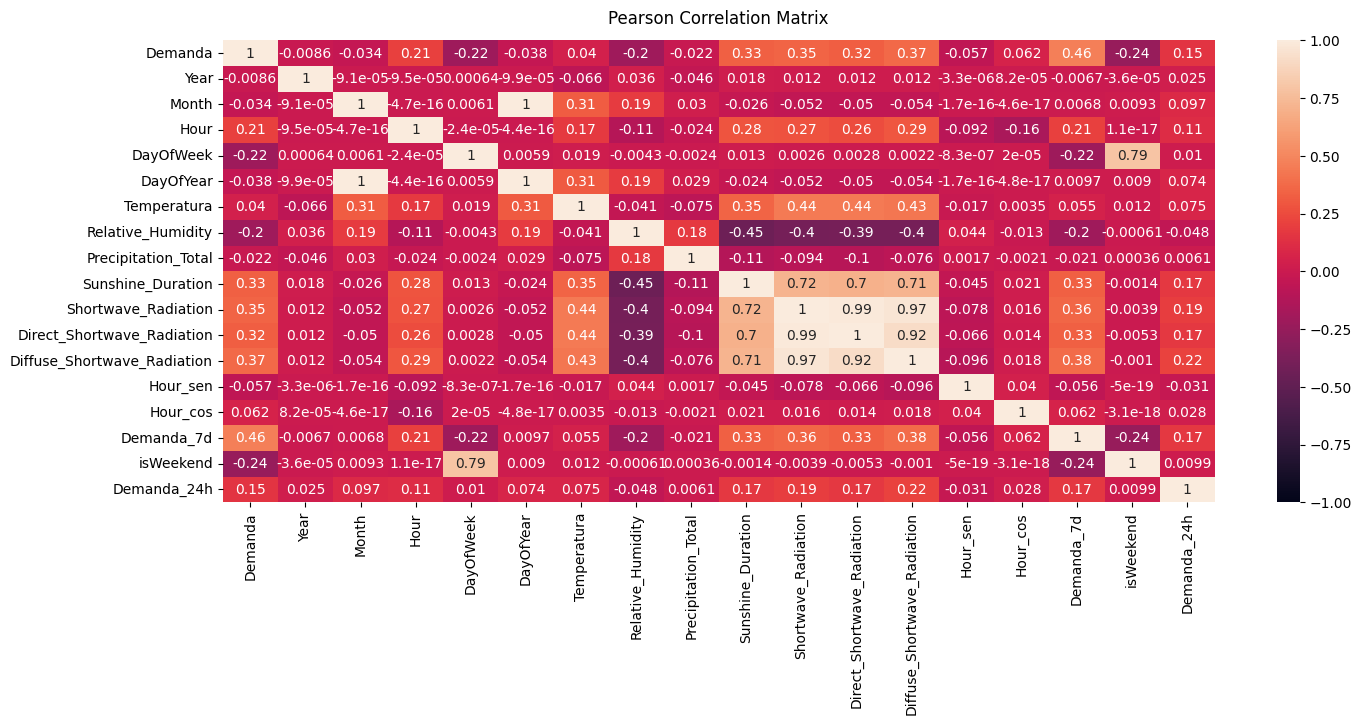

In [434]:
#Correlation Map using Pearson Correlation
plt.figure(figsize=(16,6))
corr_df = whole_df.copy()
#Drop Columns
corr_df = corr_df.drop(columns=["Date"])
heatmap = sns.heatmap(corr_df.corr('pearson'), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Pearson Correlation Matrix', fontdict={'fontsize': 12}, pad=12)

In [ ]:
print("Adios")